In [11]:
library(dplyr)
library(tidyr)
library(ggplot2)

In [28]:
options(repr.plot.width = 10, repr.plot.height = 6)

In [29]:
df <- read.csv("data/cars.tidy.csv", stringsAsFactor = FALSE)
df$price_in_1000 <- df$price / 1000

In [30]:
cor(df$mileage_city, df$price_in_1000)

[1] -0.4272635

In [31]:
cor(df$mileage_highway, df$price_in_1000)

[1] -0.5431588

In [32]:
cor(df$engine, df$mileage_city)

[1] -0.5832211

In [33]:
cor(df$price_in_1000, df$mileage_city)

[1] -0.4272635

In [34]:
cor(log10(df$price_in_1000), df$mileage_highway)

[1] -0.6229922

In [36]:
cor(c(df$gears * df$engine), df$mileage_highway)

[1] -0.6825796

In [10]:
df$mileage_city <- as.numeric(df$mileage_city)
head(df$mileage_city)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

[1] 16.2   NA  5.6  7.0  5.0  4.0

In [11]:
lm(price_in_1000 ~ mileage_city, data = df)


Call:
lm(formula = price_in_1000 ~ mileage_city, data = df)

Coefficients:
 (Intercept)  mileage_city  
       19732         -1153  


In [43]:
model <- lm(mileage_highway ~ gears + engine, data = df)

In [44]:
summary(model)


Call:
lm(formula = mileage_highway ~ gears + engine, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.500 -1.965 -0.114  1.804 11.926 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.8982660  1.1397889  18.335   <2e-16 ***
gears       -0.0994274  0.2205727  -0.451    0.653    
engine      -0.0021530  0.0001875 -11.485   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.99 on 200 degrees of freedom
Multiple R-squared:  0.5006,	Adjusted R-squared:  0.4956 
F-statistic: 100.2 on 2 and 200 DF,  p-value: < 2.2e-16


In [45]:
model <- lm(mileage_highway ~ gears + engine - 1, data = df)
summary(model)


Call:
lm(formula = mileage_highway ~ gears + engine - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.848  -2.582   1.458   3.614  11.795 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
gears   3.6670747  0.1312021   27.95   <2e-16 ***
engine -0.0030459  0.0002957  -10.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 201 degrees of freedom
Multiple R-squared:  0.9068,	Adjusted R-squared:  0.9058 
F-statistic: 977.4 on 2 and 201 DF,  p-value: < 2.2e-16


In [46]:

model <- lm(mileage_highway ~ (gears + engine - 1)^2, data = df)
summary(model)


Call:
lm(formula = mileage_highway ~ (gears + engine - 1)^2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6471 -2.0009 -0.0305  2.2292 11.3402 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
gears         3.389e+00  9.960e-02  34.030  < 2e-16 ***
engine        4.966e-03  6.594e-04   7.532 1.69e-12 ***
gears:engine -1.125e-03  8.734e-05 -12.883  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.62 on 200 degrees of freedom
Multiple R-squared:  0.949,	Adjusted R-squared:  0.9483 
F-statistic:  1242 on 3 and 200 DF,  p-value: < 2.2e-16


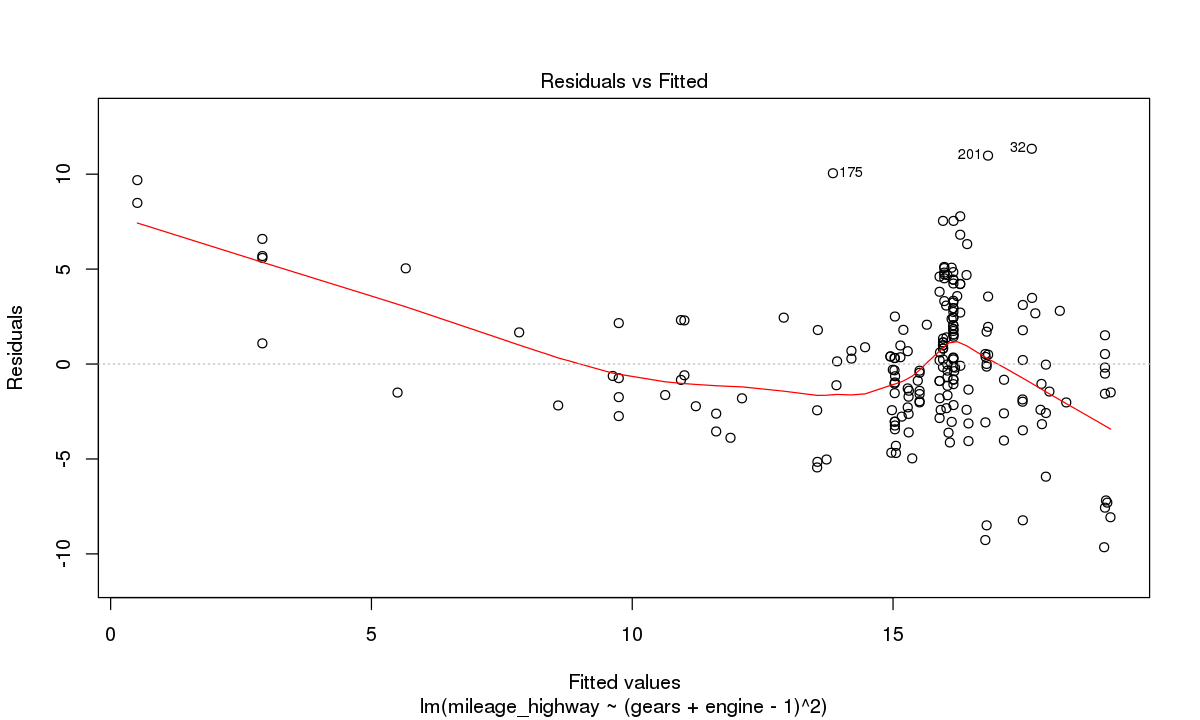

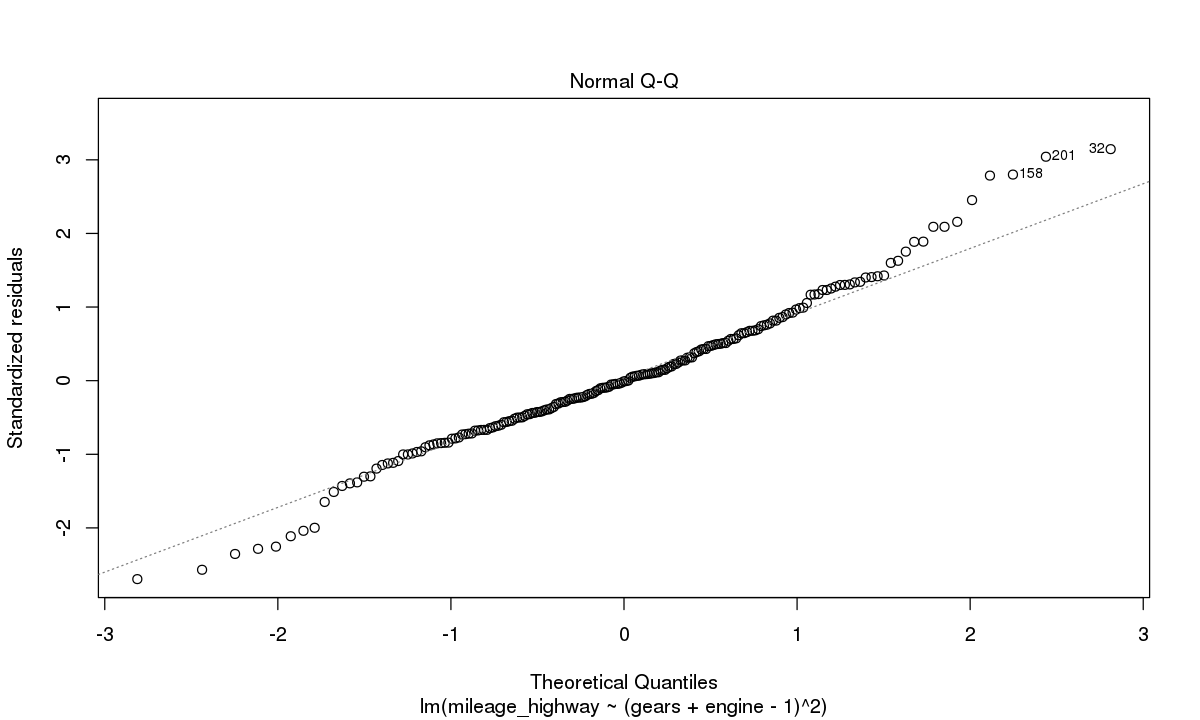

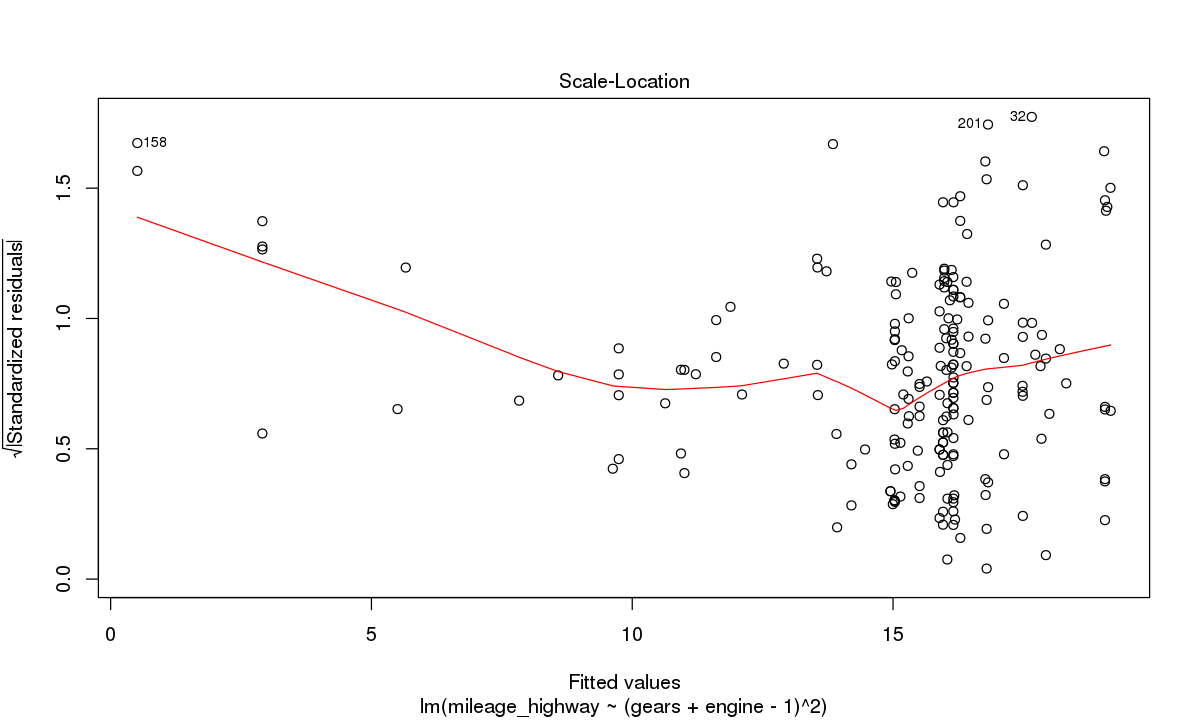

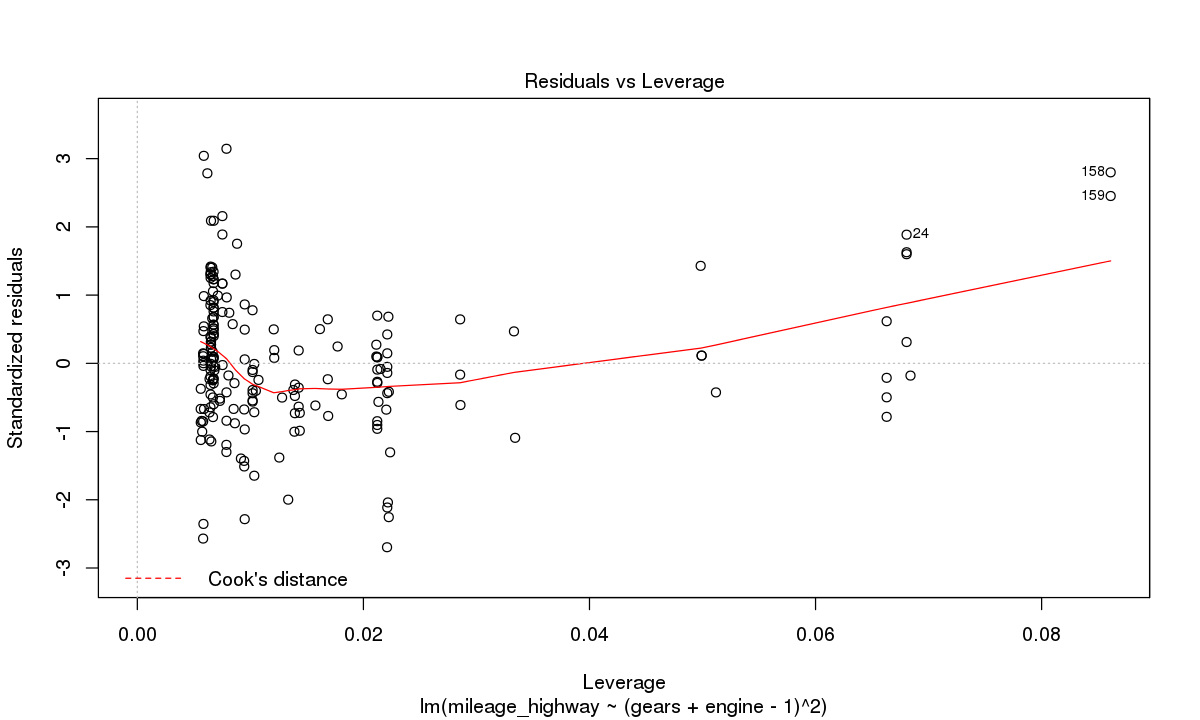

In [47]:
plot(model)